In [2]:
from importlib import reload
import cpclasses
reload(cpclasses)
from cpclasses import *
import torch



In [20]:

class LJGSystem(torch.nn.Module):
    def __init__(self, calc, Natoms):
        torch.nn.Module.__init__(self)
        self.N = Natoms
        pos = 3 * torch.rand((self.N, 2)) + 5
        self.calc = calc

        self.positions = torch.nn.Parameter( pos)
        
    def forward(self):
        rs = torch.pdist(self.positions)
        return torch.sum(self.calc._V(rs))

    def draw(self, ax):
        ax.scatter(self.positions.data[:, 0],
                   self.positions.data[:, 1], s=500)

Step 0, Loss: 5168.50048828125
Step 1000, Loss: -24.672574996948242
Step 2000, Loss: -24.478397369384766
Step 3000, Loss: -24.852554321289062
Step 4000, Loss: -24.722957611083984
Step 5000, Loss: -24.837217330932617
Step 6000, Loss: -24.830965042114258
Step 7000, Loss: -24.649639129638672
Step 8000, Loss: -24.777915954589844
Step 9000, Loss: -24.80209732055664


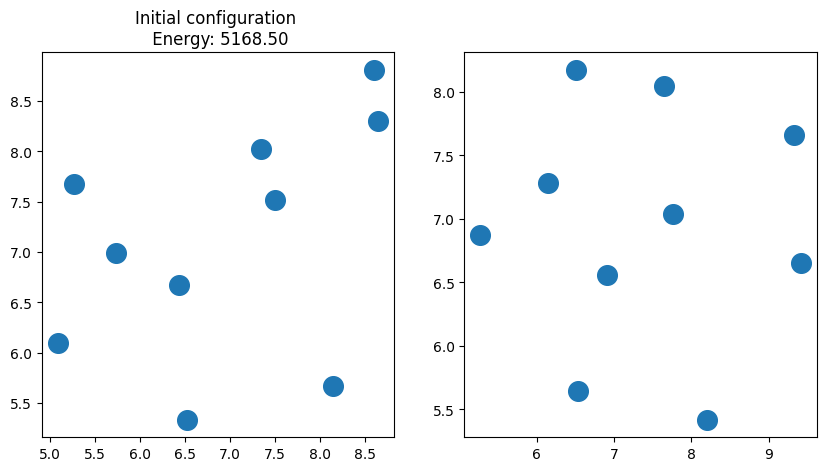

In [13]:
LJG = LJGSystem(LennardJonesGaussTorch(eps=1), 10)
LJG()

fig, axs = plt.subplots(1,2, figsize=(10,5))

LJG.draw(axs[0])
axs[0].set_title(f'Initial configuration \n Energy: {LJG():.2f}')



optimizer = torch.optim.Adam(LJG.parameters(), lr=0.1)
steps = 10000

for step in range(steps):
    optimizer.zero_grad()
    energy = LJG()
    energy.backward()

    #Ensure it doesn't go too close
    torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.5)
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {energy.item()}')

LJG.draw(axs[1])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


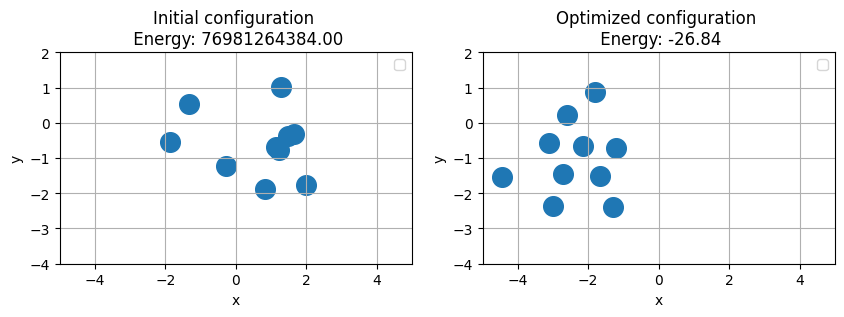

In [10]:

axs[1].set_title(f'Optimized configuration \n Energy: {LJG().item():.2f}')


for ax in axs:
    ax.set_xlim(-5, 5)
    ax.set_ylim(-4, 2)
    format_axis(ax,)
    ax.set_aspect('equal')

fig

Step 0, Loss: 737214848.0
Step 1000, Loss: -27.281625747680664
Step 2000, Loss: -27.240577697753906
Step 3000, Loss: -27.085647583007812
Step 4000, Loss: -27.228605270385742
Step 0, Loss: 5647997.0
Step 1000, Loss: -23.730510711669922
Step 2000, Loss: -23.714111328125
Step 3000, Loss: -23.668527603149414
Step 4000, Loss: -23.559226989746094
Step 0, Loss: 15258520576.0
Step 1000, Loss: -28.70330047607422
Step 2000, Loss: -28.885366439819336
Step 3000, Loss: -28.6863956451416
Step 4000, Loss: -28.552913665771484
Step 0, Loss: 1458858.25
Step 1000, Loss: -26.95928192138672
Step 2000, Loss: -27.09031867980957
Step 3000, Loss: -26.938302993774414
Step 4000, Loss: -27.050695419311523


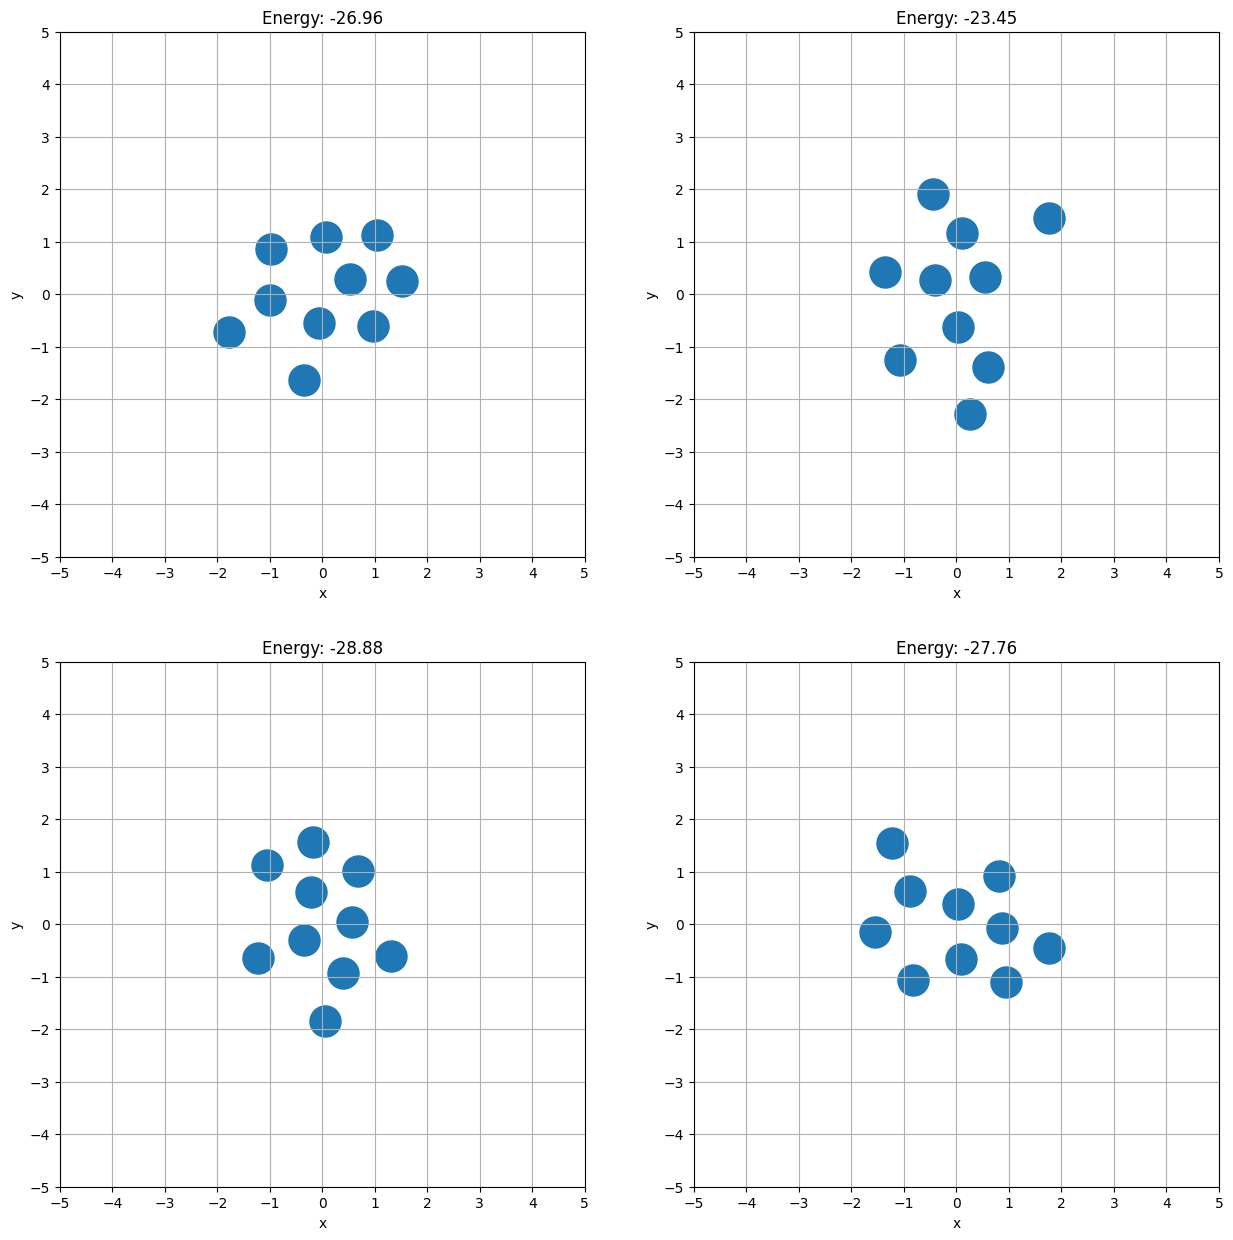

In [31]:
fig, axs = plt.subplots(2,2, figsize = (15,15))


for ax in axs.flatten():
    LJG = LJGSystem(LennardJonesGaussTorch(eps=1), 10)
    optimizer = torch.optim.Adam(LJG.parameters(), lr=0.1)
    steps = 5000

    for step in range(steps):
        optimizer.zero_grad()
        energy = LJG()
        energy.backward()

        #Ensure it doesn't go too close
        torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.5)
        optimizer.step()

        if step % 1000 == 0:
            print(f'Step {step}, Loss: {energy.item()}')

    
    format_axis(ax, title=f'Energy: {LJG().item():.2f}', legend=False)

    center_of_mass = torch.mean(LJG.positions.data, dim=0)

    LJG.positions.data -= center_of_mass
    LJG.draw(ax)

    ax.set_xlim(- 5, 5)
    ax.set_ylim(- 5, + 5)
    ax.set(xticks= range(- 5, 6,1), yticks=range(-5, 6, 1))
    

Step 0, Loss: 7.116767440440783e+27
Step 1000, Loss: -9851.447265625
Step 2000, Loss: -9846.4931640625
Step 3000, Loss: -10081.287109375
Step 4000, Loss: -10078.4921875
Step 5000, Loss: -10091.94921875
Step 6000, Loss: -10090.517578125
Step 7000, Loss: -10080.400390625
Step 8000, Loss: -10087.4169921875
Step 9000, Loss: -10083.32421875


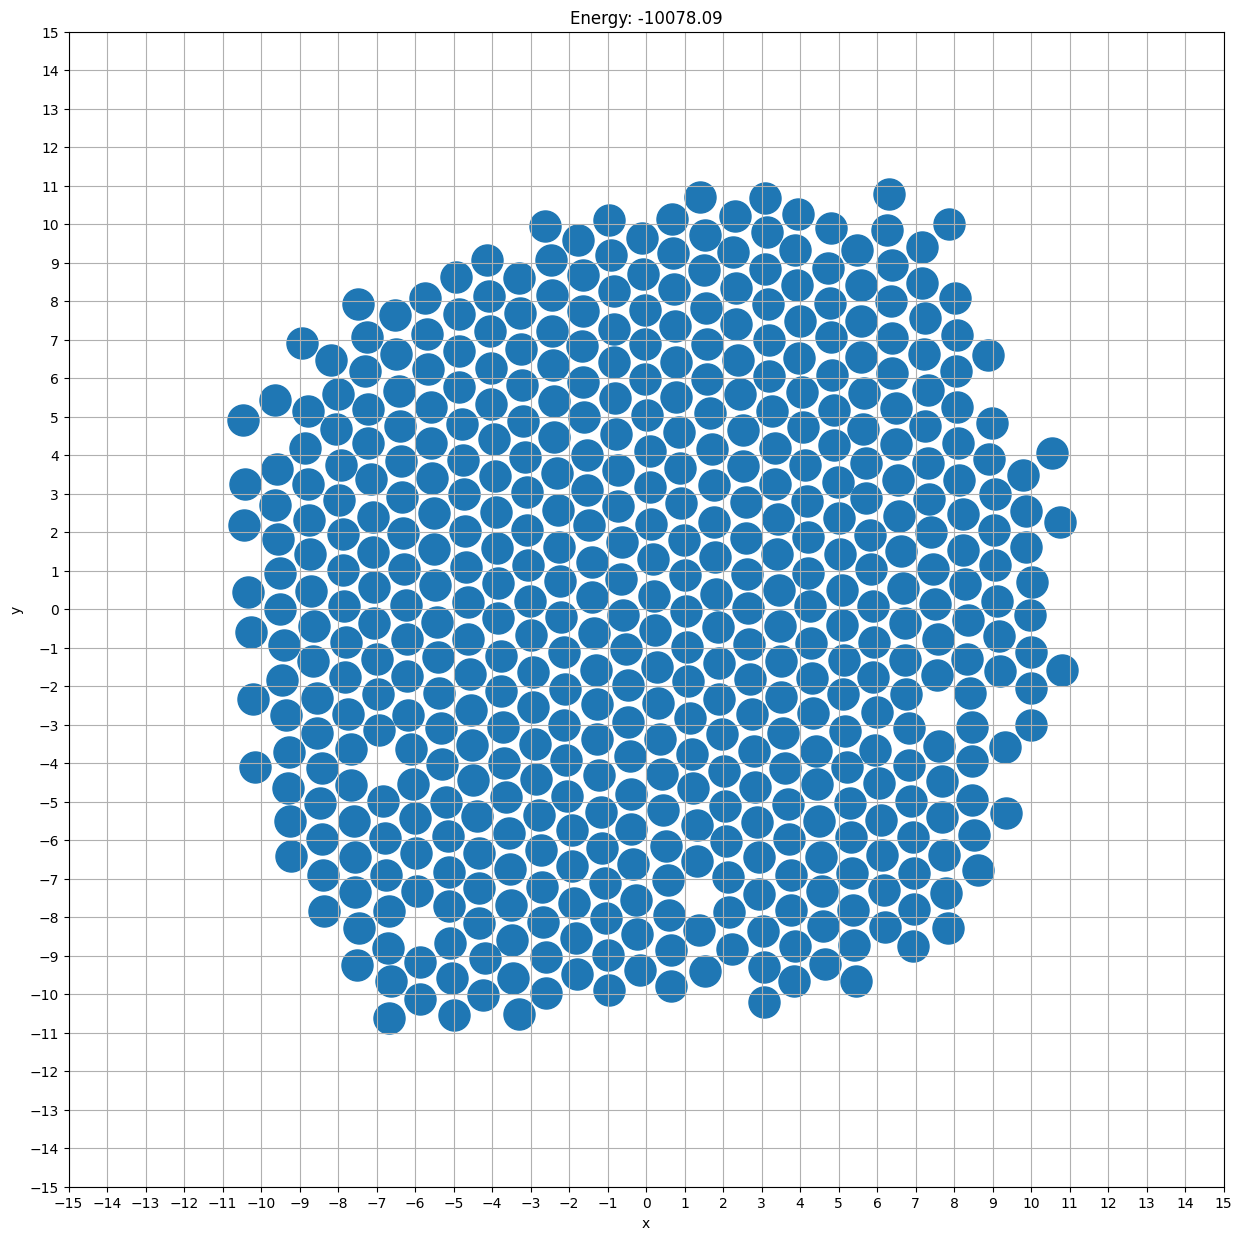

In [75]:
fig, ax = plt.subplots(1,1, figsize = (15,15))


epsilon = 0 

LJG = LJGSystem(LennardJonesGaussTorch(eps = epsilon), 500)
optimizer = torch.optim.Adam(LJG.parameters(), lr=0.1)
steps = 10000

for step in range(steps):
    optimizer.zero_grad()
    energy = LJG()
    energy.backward()

    #Ensure it doesn't go too close
    torch.nn.utils.clip_grad_value_(LJG.parameters(), clip_value = 0.5)
    optimizer.step()

    if step % 1000 == 0:
        print(f'Step {step}, Loss: {energy.item()}')


format_axis(ax, title=f'Energy: {LJG().item():.2f}', legend=False)

center_of_mass = torch.mean(LJG.positions.data, dim=0)

LJG.positions.data -= center_of_mass
LJG.draw(ax)

ax.set_xlim(- 20, 20)
ax.set_ylim(- 20,  20)
ax.set(xticks= range(- 5, 6,1), yticks=range(-5, 6, 1))

ax.set(xlim=(-10, 10), ylim=(-15, 15))
ax.set_xticks(range(-15, 16,1))
ax.set_yticks(range(-15, 16, 1))


plt.savefig(f'Figures/500_Atoms,Eps = {epsilon}.png', bbox_inches='tight')

TypeError: FigureCanvasAgg.print_png() got an unexpected keyword argument 'fig'

<Figure size 640x480 with 0 Axes>

(0.5, 5.0)

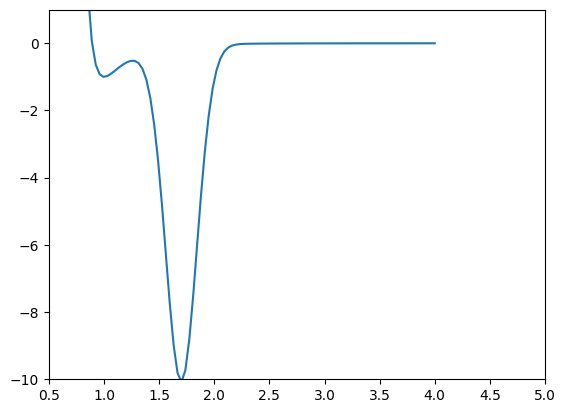

In [66]:
LJG_calc =LennardJonesGaussTorch(eps=10)

x = torch.linspace(0.5, 4, 100)

plt.plot(x, LJG_calc._V(x).detach().numpy())
plt.ylim(-10, 1)
plt.xlim(0.5, 5)